## Individual household electric power consumption Data Set

#### Problem Statement: This dataset contains electricity consumption reading of a single household after every minute for 47 months, i.e. almost 4 years.

#### Based on that we've created readings for three sub-meters and we're required to predict the total reading based on the given features.

#### Data Set Information
- This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
- Notes:
    - (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
    - The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.



#### Attribute Information
- 1.date: Date in format dd/mm/yyyy
- 2.time: time in format hh:mm:ss
- 3.global_active_power: household global minute-averaged active power (in kilowatt)
- 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)
- 5.voltage: minute-averaged voltage (in volt)
- 6.global_intensity: household global minute-averaged current intensity (in ampere)
- 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
- 8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
- 9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.




## 1) Data Ingestion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('household_power_consumption.csv', delimiter=';')

In [3]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
data.shape

(2075259, 9)

In [5]:
# taking a random sample of 50k values
# data_sample = data.sample(n=50000)

In [6]:
data.isnull().sum()   # 1.25% values

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
# data_sample.isnull().sum()  # 1.17% values

## 2) EDA

In [8]:
feature_names = data.columns

In [9]:
feature_names

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [10]:
data.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

#### Converting the features into the required data type

In [11]:
data[['Date', 'Time']] = data[['Date', 'Time']].astype('datetime64[ns]')

In [12]:
data.loc[data['Global_active_power'] == '?']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,2006-12-21,2022-11-03 11:23:00,?,?,?,?,?,?,NaN
6840,2006-12-21,2022-11-03 11:24:00,?,?,?,?,?,?,NaN
19724,2006-12-30,2022-11-03 10:08:00,?,?,?,?,?,?,NaN
19725,2006-12-30,2022-11-03 10:09:00,?,?,?,?,?,?,NaN
41832,2007-01-14,2022-11-03 18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,2010-09-28,2022-11-03 19:09:00,?,?,?,?,?,?,NaN
1990186,2010-09-28,2022-11-03 19:10:00,?,?,?,?,?,?,NaN
1990187,2010-09-28,2022-11-03 19:11:00,?,?,?,?,?,?,NaN
1990188,2010-09-28,2022-11-03 19:12:00,?,?,?,?,?,?,NaN


In [13]:
data.replace(to_replace='?', value=0.0, inplace=True)

In [14]:
for i in ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']:
    data[i] = data[i].astype(np.float64)
    print(f'Successful {i}')

Successful Global_active_power
Successful Global_reactive_power
Successful Voltage
Successful Global_intensity
Successful Sub_metering_1
Successful Sub_metering_2


In [15]:
data.dtypes

Date                     datetime64[ns]
Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

#### Creating a new feature Total_power = Sub_metering_1 + Sub_metering_2 + Sub_metering_3, bcoz this is going to be our response variable which we're going to predict

In [16]:
data['Total_power'] = data['Sub_metering_1'] + data['Sub_metering_2'] + data['Sub_metering_3']

In [17]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_power
0,2006-12-16,2022-11-03 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,18.0
1,2006-12-16,2022-11-03 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17.0
2,2006-12-16,2022-11-03 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,19.0
3,2006-12-16,2022-11-03 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,18.0
4,2006-12-16,2022-11-03 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,18.0


In [18]:
# The Sub meters reading are actually adding no value to our data, so we're going to drop them

In [19]:
data_copy = data.copy()

In [20]:
data_copy.drop(labels=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], axis=1, inplace=True)

In [21]:
data_copy.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_power
0,2006-12-16,2022-11-03 17:24:00,4.216,0.418,234.84,18.4,18.0
1,2006-12-16,2022-11-03 17:25:00,5.360,0.436,233.63,23.0,17.0
2,2006-12-16,2022-11-03 17:26:00,5.374,0.498,233.29,23.0,19.0
3,2006-12-16,2022-11-03 17:27:00,5.388,0.502,233.74,23.0,18.0
4,2006-12-16,2022-11-03 17:28:00,3.666,0.528,235.68,15.8,18.0


In [22]:
data_sample = data_copy.sample(n=5000, random_state=42)

### Analysis of Variables with Date & Time

In [23]:
def date_analysis(data, features):
    plt.figure(figsize=(15,10))
    for i in range(1, len(features)+1):
        plt.subplot(2,3, i)
        sns.relplot(kind='line', data=data, x='Date', y=features[i-1])

    plt.tight_layout()

### Replacing the outliers with the maximum and minimum values for a boxplot

In [24]:
# Didn't work
#for i in ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Total_power']:
#    data_copy.replace(to_replace=i, value=(np.quantile(a=data_copy[i],q=0.75) - np.quantile(a=data_copy[i],q=0.25))*1.5 ,
#                      inplace=True)

In [25]:
# Didn't work
# for i in ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Total_power']:
#    q3=np.quantile(a=data_copy[i],q=0.75)
#    q1=np.quantile(a=data_copy[i],q=0.25)
#    iqr=q3-q1
#    upp_bnd=q3 + 1.5*iqr
#    lwr_bnd=q1 - 1.5*iqr
    
#    np.where(data_copy[i]>upp_bnd, upp_bnd, np.where(data_copy[i]<lwr_bnd, lwr_bnd, data_copy[i]))

In [26]:
data_copy['Total_power'].replace(to_replace=np.nan, value=0.0, inplace=True)

In [27]:
# Worked
for i in ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Total_power']:
    q3=np.quantile(a=data_copy[i],q=0.75)
    q1=np.quantile(a=data_copy[i],q=0.25)
    iqr=q3-q1
    upp_bnd=q3 + 1.5*iqr
    lwr_bnd=q1 - 1.5*iqr
    
    series = data_copy[i]
    
    series[series < lwr_bnd] = lwr_bnd
    series[series > upp_bnd] = upp_bnd

<AxesSubplot: xlabel='Global_active_power'>

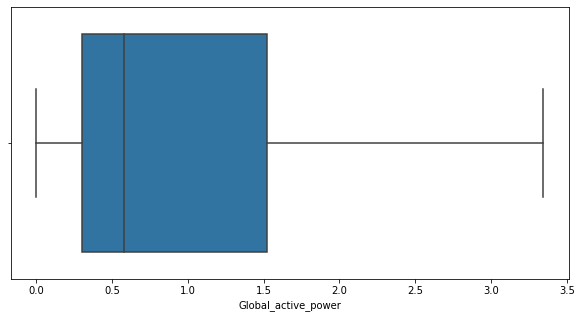

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data_copy, x='Global_active_power')

## Pre-Processing

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Before pre-processing our data, we should split the the target column and the rest of the columns. After that we'll separate the whole data into training and test sets

<AxesSubplot: xlabel='Total_power'>

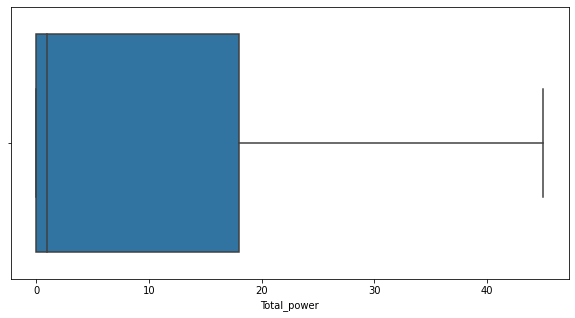

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data_copy, x='Total_power')

In [31]:
# Saving the pre-processed dataframe
with open('dataFrame.txt', 'wb') as f:
    pickle.dump(obj=data_copy, file=f)
f.close()

<IPython.core.display.Javascript object>

In [32]:
X = data_copy.drop(labels=['Total_power'], axis=1)
y = data_copy['Total_power']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [34]:
scalar = StandardScaler()

In [35]:
X_train_scaled = scalar.fit_transform(X_train[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']])

## Model Training

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#### Training the Linear Regression Model

In [37]:
lin_reg = LinearRegression()

In [38]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [39]:
# Pre-Processing the Testing Data to make Predictions

In [40]:
X_test_scaled = scalar.transform(X_test[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']])

In [41]:
predictions = lin_reg.predict(X_test_scaled)

In [42]:
import pickle

In [43]:
## Saving the model
with open('lin_reg_model.txt', 'wb') as f:
    pickle.dump(obj=lin_reg, file=f)
f.close()

In [44]:
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
r2 = r2_score(y_test, predictions)

In [46]:
r2

0.6994197281267696

In [47]:
adj_r2 = 1 - ((1-r2)*(X_train_scaled.shape[0]-1) / (X_train_scaled.shape[0] - X_train_scaled.shape[1] - 1))
adj_r2

0.6994188634076077

##### R-Square and Adjusted-R-Square are almost same. This means that our model right now explains, 70% of the total variation.

In [48]:
mse = mean_squared_error(y_test, predictions)
mse   

38.16204055904335

In [49]:
rmse = np.sqrt(mse)
rmse

6.177543246230118

### Using more models to predict data

In [50]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [51]:
# Ridge Regression
ridge_reg = Ridge(alpha=5.0)  # l2-norm

In [52]:
ridge_reg.fit(X_train_scaled, y_train)

Ridge(alpha=5.0)

In [53]:
predictions_ridge = ridge_reg.predict(X_test_scaled)

In [54]:
r2_ridge = r2_score(y_test, predictions_ridge)
r2_ridge

0.6994178078145954

In [55]:
mse_ridge = mean_squared_error(y_test, predictions_ridge)
mse_ridge   

38.162284364235965

In [56]:
rmse_ridge=np.sqrt(mse_ridge)
rmse_ridge

6.177562979382401

In [57]:
## Saving the model
with open('ridge_reg_model.txt', 'wb') as f:
    pickle.dump(obj=ridge_reg, file=f)
f.close()

In [58]:
# Lasso Regression
lasso_reg = Lasso(alpha=6.0)   # l1-norm

In [59]:
lasso_reg.fit(X_train_scaled, y_train)

Lasso(alpha=6.0)

In [60]:
predictions_lasso = lasso_reg.predict(X_test_scaled)

In [61]:
r2_lasso = r2_score(y_test, predictions_lasso)
r2_lasso

0.4104242939278352

In [62]:
mse_lasso = mean_squared_error(y_test, predictions_lasso)
mse_lasso

74.85325589578844

In [63]:
rmse_lasso = np.sqrt(mse_lasso)
rmse_lasso

8.65177761479041

In [64]:
## Saving the model
with open('lasso_reg_model.txt', 'wb') as f:
    pickle.dump(obj=lasso_reg, file=f)
f.close()

In [65]:
# ElasticNet Regression
elastic_net = ElasticNet(alpha=6.0, l1_ratio=0.4)  # Combo of l1 & l2-norm

In [66]:
elastic_net.fit(X_train_scaled, y_train)

ElasticNet(alpha=6.0, l1_ratio=0.4)

In [67]:
predictions_elsNet = elastic_net.predict(X_test_scaled)

In [68]:
r2_elsNet = r2_score(y_test, predictions_elsNet)
r2_elsNet

0.31940861362896655

In [69]:
mse_elsNet = mean_squared_error(y_test, predictions_elsNet)
mse_elsNet

86.40871847298388

In [70]:
rmse_elsNet = np.sqrt(mse_elsNet)
rmse_elsNet

9.295628998243416

In [71]:
## Saving the model
with open('elastic_net_model.txt', 'wb') as f:
    pickle.dump(obj=elastic_net, file=f)
f.close()

## Training SVM

In [72]:
from sklearn.svm import SVR

In [73]:
svr = SVR(kernel='rbf', degree=3, gamma='scale')

In [ ]:
# Taking too long to fit data. Didn't able to fit even after 1 hour
svr.fit(X_train_scaled, y_train)